<a href="https://colab.research.google.com/github/duySWEtdtu0406/textsumary_Research/blob/main/TextSumary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyvi
!pip install pytorch
!pip install underthesea
!pip install keras
!pip install pandas
!pip install gensim

import pyvi
import nltk
from underthesea import word_tokenize
from tensorflow import keras
from __future__ import print_function
from keras.models import Model
from keras.layers import Input, LSTM, Dense
import numpy as np
import io
from pickle import load
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
from pyvi import ViTokenizer
import string

  Using cached https://files.pythonhosted.org/packages/ee/67/f403d4ae6e9cd74b546ee88cccdb29b8415a9c1b3d80aebeb20c9ea91d96/pytorch-1.0.2.tar.gz
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-eiathkuw/pytorch/setup.py'"'"'; __file__='"'"'/tmp/pip-install-eiathkuw/pytorch/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-05c6o5iw/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
import os
import pandas as pd
from __future__ import print_function
import gensim
from gensim import *
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
from keras.models import Model
from keras.layers import Input, LSTM, Dense

In [ ]:
from google.colab import drive
drive.mount("/dataset", force_remount=True)

Mounted at /dataset


In [ ]:
import sys
import os

import importlib.util
spec = importlib.util.spec_from_file_location("attentionn.py", "/dataset/MyDrive/Colab Notebooks/attentionn.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
foo.AttentionLayer

attentionn.py.AttentionLayer

In [ ]:
stopword = open('/dataset/MyDrive/vietnamese_stopword.txt', 'r')
stopword = stopword.read()

In [ ]:
def clean_document(doc,remove_stopwords=True):
    doc = ViTokenizer.tokenize(doc) #Pyvi Vitokenizer library
    doc = doc.lower() #Lower
    tokens = doc.split() #Split in_to words
    table = str.maketrans('', '', string.punctuation.replace("_", "")) #Remove all punctuation
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word]
    if remove_stopwords:
      tokens = [i for i in tokens if not i in stopword]
      tokens = " ".join(tokens)
    return tokens

In [ ]:
#pre-processing - document
# nltk.download('punkt') 
def pre_processing(data, remove_stopwords=True):
  data = data.lower()
  data = data.replace('\n', '. ')
  data = data.strip()
  data = word_tokenize(data)
  if remove_stopwords:
    data = [i for i in data if not i in stopword]
  data = " ".join(data)
  return data

In [ ]:
from pathlib import Path
import pandas as pd

path1 = ['/dataset/MyDrive/donvanban/Plaintext/Chinh tri','/dataset/MyDrive/donvanban/Plaintext/Van Hoa','/dataset/MyDrive/donvanban/Plaintext/Xa Hoi','/dataset/MyDrive/donvanban/Plaintext/boKHCN','/dataset/MyDrive/donvanban/Plaintext/khoahoc_giaoduc','/dataset/MyDrive/donvanban/Plaintext/kinhte']
path2 = ['/dataset/MyDrive/donvanban/Summary_manual/Chinh Tri','/dataset/MyDrive/donvanban/Summary_manual/Van Hoa','/dataset/MyDrive/donvanban/Summary_manual/Xa Hoi','/dataset/MyDrive/donvanban/Summary_manual/boKHCN','/dataset/MyDrive/donvanban/Summary_manual/khoahoc_giaoduc','/dataset/MyDrive/donvanban/Summary_manual/kinhte']

DataFrame = []
SumFrame= []
for i in path1:
  entries =sorted(os.listdir(i))
  for a in entries:
    #make path
    newPath = i + '/'+ a
    e_entries = Path(newPath)
    #read each path 
    with open(e_entries, 'r',encoding='utf-8-sig', errors='ignore') as f:
      data = clean_document(f.read(),True)
      DataFrame.append({'Text': [data]})

df = pd.DataFrame(DataFrame)#

for i in path2:
  entries = sorted(os.listdir(i))
  for a in entries:
    #make path
    newPath = i + '/'+ a
    e_entries = Path(newPath)
    #read each path 
    with open(e_entries, 'r',encoding='utf-8-sig', errors='ignore') as f:
      Sumary = clean_document(f.read(),False)
      # Sumary = ' '.join([str(elem.replace("_"," ")) for elem in Sumary])
      # Sumary.replace("_"," ")
      SumFrame.append([Sumary])
df['Sumary'] = SumFrame
print(df)

                                                  Text                                             Sumary
0    [ưu_tiên việt_nam xây điện hạt_nhân 11 4 đại_s...  [[ngày, 11, 4, đại_sứ, liên_bang, nga, tại, vi...
1    [việt_nam philippines cam_kết phối_hợp giải_qu...  [[nhận_lời, mời, của, bộ_trưởng, ngoại_giao, p...
2    [đại_tướng lê_đức huy_hiệu 75 năm_tuổi đảng ch...  [[chiều, 29, 7, đại_tướng, lê_đức_anh, nguyên,...
3    [7 đoàn công_tác phòng chống tham_nhũng ký thô...  [[ký, thông_báo, kết_luận, của, tổng_bí_thư, n...
4    [tuyên_dương 300 đồng_bào dân_tộc_thiểu_số 5 t...  [[sáng, ngày, 25, 7, tại, tp, vinh, tỉnh, nghệ...
..                                                 ...                                                ...
195  [samsung đau_đầu giàu tiền_mặt dự_trữ nhanh_ch...  [[sau, quý, i, 2013, thành_công, với, lợi_nhuậ...
196  [“ vàng ” bỏ_hoang nợ hàng trăm tỷ đồng_tiền t...  [[hàng, chục, dự_án, được, cấp, giấy_phép, đầu...
197  [xây_dựng kiểm_tra dự_án chênh hàng trăm 

In [ ]:
df.to_csv("/dataset/MyDrive/donvanban/alo.csv")

In [ ]:
for i in range(5):
    print("Review:",df['Text'][i])
    print("Summary:",df['Sumary'][i])
    print("\n")

Review: ['ưu_tiên việt_nam xây điện hạt_nhân 11 4 đại_sứ liên_bang việt_nam andrey_kovtun đoàn công_tác thăm làm_việc tỉnh ninh_thuận tình_hình triển_khai xây_dựng nhà_máy_điện hạt_nhân ninh_thuận làm_việc chủ_tịch ủy_ban nhân_dân tỉnh ninh_thuận nguyễn_đức_thanh tỉnh hoàn_chỉnh chính_sách cơ_chế đặc_thù thủ_tướng chính_phủ_phê_duyệt tỉnh hoàn_thành_công_tác đo_đạc bản_đồ thu_hồi sử_dụng khu_vực triển_khai dự_án khu_vực thu_hồi xây_dựng nhà_máy khu tái_định_cư khu nghĩa_trang hệ_thống cấp_nước phục_vụ khu tái_định_cư nhà_máy_điện hạt_nhân ninh_thuận 1 đồng_thời hoàn_thành_công_tác kiểm_kê khu_vực lõi nhà_máy hiện_nay tỉnh hoàn_thành khảo_sát đo_đạc địa_hình địa_chất phục_vụ công_tác quy_hoạch dự_án đầu_tư hoàn_thành_công_tác quy_hoạch chi_tiết khu tái_định_cư nhà_máy 1 diện_tích 869 khu nghĩa_trang diện_tích 108 tỉnh thành_lập ban quản_lý dự_án điện hạt_nhân thực_hiện dự_án di_dân tái_định_cư ủy_ban nhân_dân tỉnh làm_chủ đầu_tư tỉnh phấn_đấu hoàn_thành_công_tác bồi_thường giải_phóng mặ

In [ ]:
df=pd.read_csv("/dataset/MyDrive/donvanban/alo.csv",encoding='utf-8-sig')

df['Sumary'] = df['Sumary'].apply(lambda x : '_START_ '+ x + ' _END_')
print(df)

     Unnamed: 0  ...                                             Sumary
0             0  ...  _START_ [['ngày', '11', '4', 'đại_sứ', 'liên_b...
1             1  ...  _START_ [['nhận_lời', 'mời', 'của', 'bộ_trưởng...
2             2  ...  _START_ [['chiều', '29', '7', 'đại_tướng', 'lê...
3             3  ...  _START_ [['ký', 'thông_báo', 'kết_luận', 'của'...
4             4  ...  _START_ [['sáng', 'ngày', '25', '7', 'tại', 't...
..          ...  ...                                                ...
195         195  ...  _START_ [['sau', 'quý', 'i', '2013', 'thành_cô...
196         196  ...  _START_ [['hàng', 'chục', 'dự_án', 'được', 'cấ...
197         197  ...  _START_ [['đoàn', 'kiểm_tra', 'bộ', 'xây_dựng'...
198         198  ...  _START_ [['với', 'kim_ngạch', 'xuất_khẩu', 'tă...
199         199  ...  _START_ [['ủy_ban', 'giám_sát', 'tài_chính', '...

[200 rows x 3 columns]


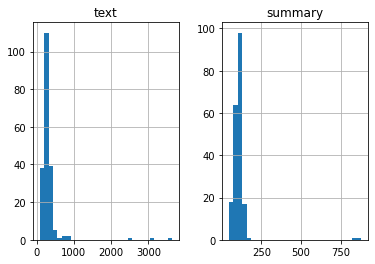

In [ ]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['Text']:
      text_word_count.append(len(i.split()))

for i in df['Sumary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [ ]:
max_len_text=300
max_len_summary=50
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(df['Text'],df['Sumary'],test_size=0.3,random_state=0,shuffle=True) 
print(y_tr)

131    _START_ [['nhiều', 'bạn', 'trẻ', 'sở_hữu', 'và...
96     _START_ [['trong', 'số', '108', 'loài', 'động_...
181    _START_ [['sau', 'quý', 'i', '2013', 'thành_cô...
19     _START_ [['petrovietnam', 'và', 'tổng', 'công_...
153    _START_ [['trường', 'thcs', 'và', 'thpt', 'tạ'...
                             ...                        
67     _START_ [['để', 'góp_phần', 'chống', 'hạn', 'c...
192    _START_ [['theo', 'khẳng_định', 'của', 'ngân_h...
117    _START_ [['trang_bị', 'kiến_thức', 'về', 'định...
47     _START_ [['lễ_ramadan', 'của', 'người', 'hồi_g...
172    _START_ [['chất_lượng', 'các', 'công_trình', '...
Name: Sumary, Length: 140, dtype: object


In [ ]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))
#filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ '
#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)
print(x_tr)
#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1
print(x_voc_size)

[[1557, 111, 362, 698, 48, 6, 278, 130, 233, 48, 6, 654, 41, 1758, 655, 14, 2, 111, 565, 80, 4, 183, 6, 59, 255, 190, 1220, 51, 282, 420, 41, 48, 6, 48, 6, 363, 634, 200, 172, 181, 6, 153, 157, 17, 46, 566, 3, 2, 111, 6, 138, 6, 934, 218, 1759, 1760, 36, 120, 190, 1220, 51, 282, 102, 39, 850, 981, 4, 36, 120, 46, 615, 317, 42, 299, 2, 2, 111, 237, 893, 389, 465, 521, 346, 53, 74, 2519, 36, 120, 214, 1558, 271, 179, 466, 402, 1420, 225, 278, 51, 282, 46, 35, 46, 4, 18, 412, 193, 483, 655, 14, 128, 167, 102, 1421, 521, 6, 579, 364, 1559, 2520, 2004, 27, 27, 545, 13, 38, 4, 36, 215, 365, 4, 128, 167, 2521, 1560, 11, 450, 1141, 170, 724, 111, 93, 1422, 1561, 699, 128, 982, 935, 51, 282, 521, 329, 522, 1302, 699, 128, 498, 755, 678, 55, 24, 755, 184, 71, 374, 390, 635, 1562, 389, 20, 1142, 38, 30, 184, 71, 292, 154, 13, 272, 318, 226, 173, 580, 1221, 756, 420, 41, 11, 450, 679, 567, 655, 14, 326, 1423, 4, 420, 41, 271, 179, 251, 39, 2522, 234, 111, 93, 92, 162, 1761, 1424, 413, 94, 521, 568

In [ ]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1
print(y_voc_size)

2874


In [ ]:
print(y_tr)

[[ 179    4   53 ...    4  386   12]
 [  28  143  200 ...  330   91   12]
 [ 578  218  718 ...    4  386   12]
 ...
 [  24   68   49 ...  308  309   12]
 [ 460 1811  363 ...  457  126   12]
 [  91  186  173 ... 1860  373   12]]


In [ ]:
from keras import backend as K 
K.clear_session() 
latent_dim = 512

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

attn_layer = foo.AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 512)     1941504     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 300, 512), ( 2099200     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=110,batch_size=64, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/110
3/3 [==============================] - 41s 1s/step - loss: 7.9378 - accuracy: 0.0087 - val_loss: 7.8390 - val_accuracy: 0.0204
Epoch 2/110
3/3 [==============================] - 2s 681ms/step - loss: 7.6190 - accuracy: 0.0138 - val_loss: 7.1199 - val_accuracy: 0.0133
Epoch 3/110
3/3 [==============================] - 2s 683ms/step - loss: 6.9797 - accuracy: 0.0151 - val_loss: 7.9055 - val_accuracy: 6.8027e-04
Epoch 4/110
3/3 [==============================] - 2s 673ms/step - loss: 7.5924 - accuracy: 0.0115 - val_loss: 7.0950 - val_accuracy: 0.0245
Epoch 5/110
3/3 [==============================] - 2s 677ms/step - loss: 6.8899 - accuracy: 0.0274 - val_loss: 7.0260 - val_accuracy: 0.0265
Epoch 6/110
3/3 [==============================] - 2s 674ms/step - loss: 6.8015 - accuracy: 0.0301 - val_loss: 7.0656 - val_accuracy: 0.0262
Epoch 7/110
3/3 [==============================] - 2s 670ms/step - loss: 6.7733 - accuracy: 0.0298 - val_loss: 7.0611 - val_accuracy: 0.0354
Epoch 8/110

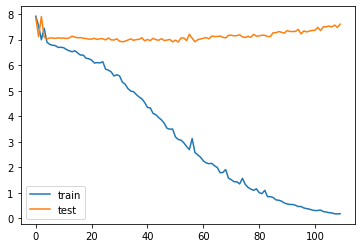

In [ ]:
from matplotlib import pyplot 

pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [ ]:
print(target_word_index)

{"'": 1, "x00'": 2, "'và'": 3, "'của'": 4, "'các'": 5, 'x00': 6, "'trong'": 7, "'đã'": 8, "'được'": 9, "'công": 10, 'start': 11, 'end': 12, "'có'": 13, "'cho'": 14, "'là'": 15, "'với'": 16, "'về'": 17, "'những'": 18, "'người'": 19, "'việt": 20, "nam'": 21, "'không'": 22, "'năm'": 23, "'để'": 24, "'một'": 25, "'sẽ'": 26, "'nhiều'": 27, "'tại'": 28, "tế'": 29, "định'": 30, "'từ'": 31, "'h'": 32, "'n'": 33, "'ra'": 34, "'đến'": 35, "'việc'": 36, "'trên'": 37, "trình'": 38, "'này'": 39, "'kinh": 40, "động'": 41, "'thành": 42, "'phát": 43, "'đầu": 44, "trường'": 45, "tác'": 46, "'vào'": 47, "'ngày'": 48, "hiện'": 49, "'nhà'": 50, "'khi'": 51, "'ở'": 52, "'thị": 53, "'cũng'": 54, "'theo'": 55, "nghiệp'": 56, "'hơn'": 57, "'quốc": 58, "'bộ'": 59, "học'": 60, "'đó'": 61, "dụng'": 62, "chức'": 63, "'dự": 64, "giá'": 65, "nhân'": 66, "'trung": 67, "'thực": 68, "lý'": 69, "'văn": 70, "'đối": 71, "'cơ": 72, "bộ'": 73, "'nhà": 74, "'tỉnh'": 75, "'đại": 76, "'xây": 77, "'tổ": 78, "'kh'": 79, "'cn'":

In [ ]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
import numpy as np
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(len(x_val)):
  print("Review:",seq2text(x_val[i]))

  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")

Review: quan trọng tác động đời sống kinh tế xã hội đất nước dân một số nội dung dự thảo liên quan dự thảo sửa đổi hiến pháp 1992 dự thảo sửa đổi hiến pháp chỉnh lý cơ sở tiếp thu ý kiến nhân dân ý kiến đại biểu quốc hội cơ quan tổ chức hữu quan vì vậy quốc hội đề nghị quốc hội phép thông qua dự án đất đai sửa đổi thông qua dự thảo sửa đổi hiến pháp họp 6 lùi thời điểm xác định hiệu lực thi hành nửa dự kiến thông qua họp hiệu lực thi hành 2014 như ý kiến đa số đại biểu thường vụ quốc hội nhận định quốc hội thông qua họp cơ quan thời gian tiếp tục nghiên cứu hoàn chỉnh dự thảo chuẩn bị nghị định quy định chi tiết hướng dẫn thi hành đảm bảo khả thi vấn đề đa số đại biểu đề nghị quốc hội nghị quyết kéo dài thời hạn sử dụng trồng hàng nuôi trồng thủy sản muối gia đình cá nhân nội dung phiên biểu quyết thông qua đất đai sửa đổi diễn chiều 21 6 dự kiến đoàn thư ký họp bố trí chương trình quốc hội biểu quyết thông qua nghị quyết kéo dài thời hạn sử dụng trồng hàng nuôi trồng thủy sản muối gia